In [24]:
from transformers import BertForQuestionAnswering, BertTokenizer
import matplotlib.pyplot as plt
from scipy.special import softmax
import plotly.express as px
import pandas as pd
import numpy as np
import torch

In [25]:
# Inputs
context = "ChatGPT is a generative artificial intelligence chatbot developed by OpenAI and released on November 30, 2022"
question = "When did chargpt released ?"


In [31]:
# Model and tokenizer
model_name = "deepset/bert-large-uncased-whole-word-masking-squad2"
model = BertForQuestionAnswering.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Encode question and context
inputs = tokenizer(question, context, return_tensors="pt")

Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
# Run model
with torch.no_grad():
    outputs = model(**inputs)

# Extract logits
start_logits = outputs.start_logits[0]
end_logits = outputs.end_logits[0]

# Apply softmax to get probabilities
start_probs = softmax(start_logits.numpy())
end_probs = softmax(end_logits.numpy())

# Get the most probable start and end positions
start_index = torch.argmax(start_logits)
end_index = torch.argmax(end_logits)

In [35]:
# Decode the answer
tokens = inputs["input_ids"][0]
answer = tokenizer.decode(tokens[start_index:end_index+1])
print(f"Answer: {answer}")

Answer: november 30, 2022


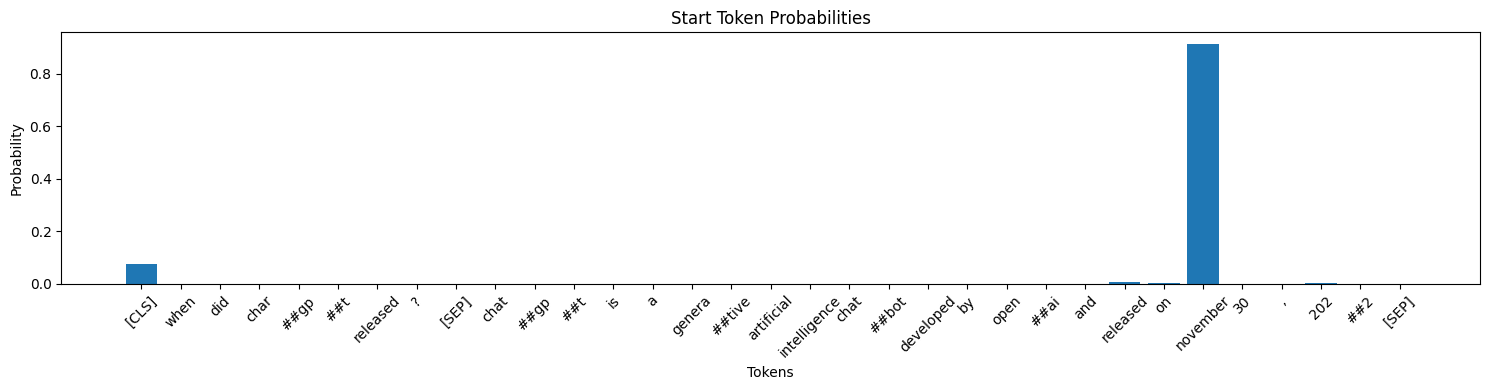

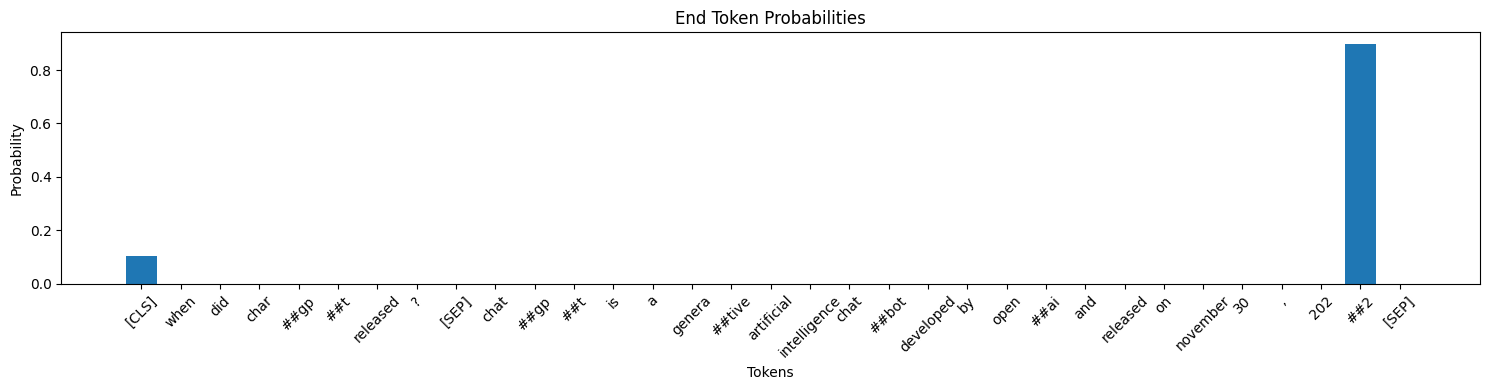

In [34]:
def visualize_probs_with_plt(probs_tensor, token_ids, title):
    # Convert logits to probabilities
    probs = softmax(probs_tensor.detach().cpu().numpy())[:len(token_ids)]
    tokens = tokenizer.convert_ids_to_tokens(token_ids)

    # Plot
    plt.figure(figsize=(15, 4))
    plt.bar(range(len(tokens)), probs, tick_label=tokens)
    plt.xticks(rotation=45)
    plt.xlabel("Tokens")
    plt.ylabel("Probability")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
visualize_probs_with_plt(outputs.start_logits[0], tokens, "Start Token Probabilities")
visualize_probs_with_plt(outputs.end_logits[0], tokens, "End Token Probabilities")
